In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import pywt
import pywt.data
import pandas as pd
from slicing import sliced_data

In [6]:
[normal_record_pieces, seizure_record_pieces] = record = sliced_data()[0]
y = normal_record_pieces[0]
wp = pywt.WaveletPacket(data=y, wavelet='db1',mode='symmetric',maxlevel=3)
#根据频段频率（freq）进行排序
print([node.path for node in wp.get_level(1, 'freq')])
print([node.path for node in wp.get_level(2, 'freq')])
print([node.path for node in wp.get_level(3, 'freq')])

Extracting EDF parameters from D:\workspace2\eeg-epilepsy\data\p10_Record1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5401499  =      0.000 ... 10802.998 secs...
=== record_time === 2022-12-13 05:36:39
s_index, s_index_end:  3599500 3822000
=== raw_data.shape ===  (19, 5401500)
=== normal_record.shape ===  (19, 5179000)
=== seizure_record.shape ===  (19, 222500)
Extracting EDF parameters from D:\workspace2\eeg-epilepsy\data\p10_Record2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5399499  =      0.000 ... 10798.998 secs...
=== record_time === 2022-12-13 04:29:14
s_index, s_index_end:  3600000 3752500
=== raw_data.shape ===  (19, 5399500)
=== normal_record.shape ===  (19, 5247000)
=== seizure_record.shape ===  (19, 152500)
['a', 'd']
['aa', 'ad', 'dd', 'da']
['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']


In [7]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [13]:
def wpd_plt(signal,n):
    #wpd分解
    wp = pywt.WaveletPacket(data=signal, wavelet='db1',mode='symmetric',maxlevel=n)

    #计算每一个节点的系数，存在map中，key为'aa'等，value为列表
    map = {}
    map[1] = signal
    for row in range(1,n+1):
        lev = []
        for i in [node.path for node in wp.get_level(row, 'freq')]:
            map[i] = wp[i].data

    #作图
    plt.figure(figsize=(30, 10))
    plt.subplot(n+1,1,1) #绘制第一个图
    plt.plot(map[1])
    for i in range(2,n+2):
        level_num = pow(2,i-1)  #从第二行图开始，计算上一行图的2的幂次方
        #获取每一层分解的node：比如第三层['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']
        re = [node.path for node in wp.get_level(i-1, 'freq')]
        for j in range(1,level_num+1):
            plt.subplot(n+1,level_num,level_num*(i-1)+j)
            plt.plot(map[re[j-1]]) #列表从0开始

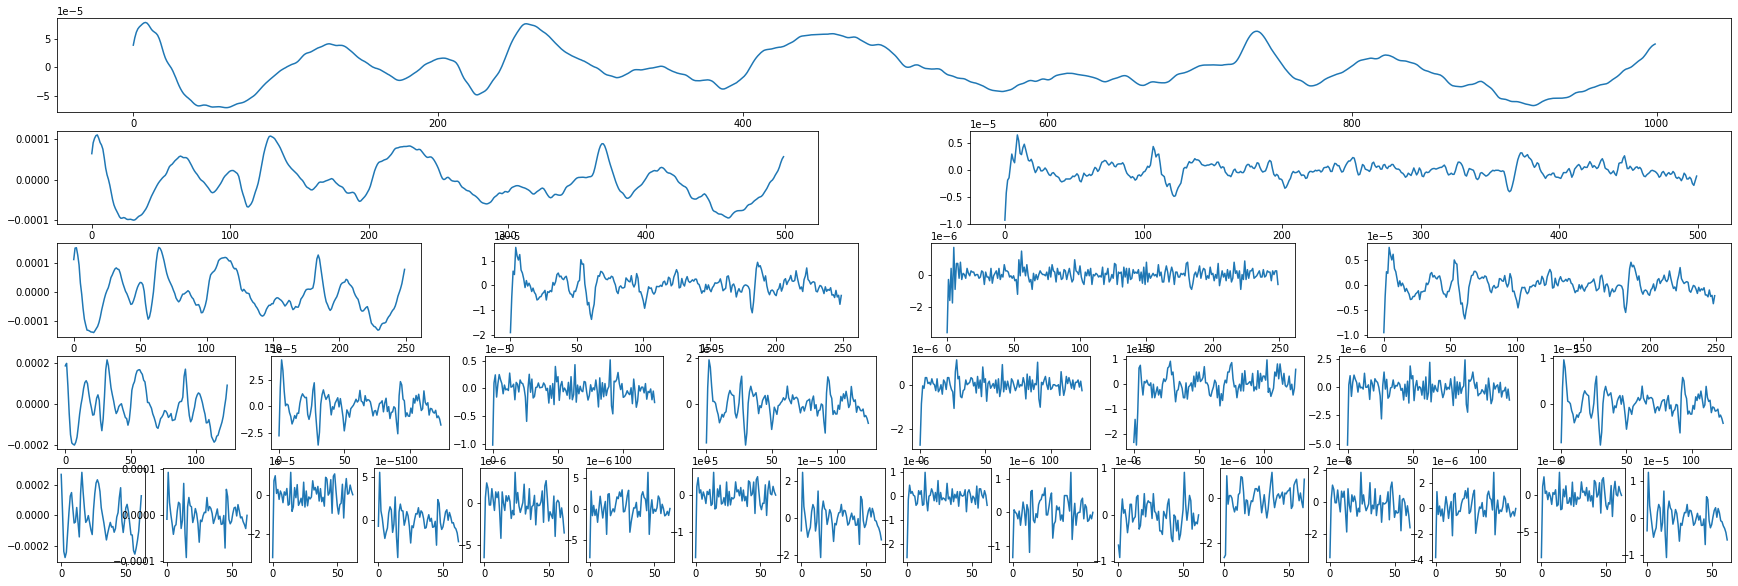

In [15]:
wpd_plt(y[0], 4)